<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Introduction to PyTorch

In [1]:
# Install pytorch and torchvision if you have not already done so
# pip3 install torch torchvision

In [1]:
import numpy as np
import pandas as pd
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

torch.manual_seed(0)

# Introduction to Tensors

The basic object used in PyTorch is the 'Tensor' which is equivalent to 'ndarray' in Numpy. Similar to Numpy, there are multiple types of Tensors, e.g. Float, Double, Int, Long, etc. Generally we will use FloatTensors, and it is the default type for most functions.

In [2]:
# Create a tensor manually
x_manual = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
x_manual

tensor([[1., 2.],
        [3., 4.]])

In [3]:
x_ones = torch.ones(3,4)
print(x_ones)

x_zeros = torch.zeros(3,4)
print(x_zeros)

x_uniform = torch.rand(3,4)
print(x_uniform)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.4963, 0.7682, 0.0885, 0.1320],
        [0.3074, 0.6341, 0.4901, 0.8964],
        [0.4556, 0.6323, 0.3489, 0.4017]])


In [4]:
# Create a tensor from a NumPy array
np_array = np.array([1., 2., 3.], dtype=np.float32)
print(np_array)
torch_tensor = torch.from_numpy(np_array)
print(torch_tensor)

[1. 2. 3.]
tensor([1., 2., 3.])


In [8]:
# Create a NumPy array from a tensor
another_tensor = torch.rand(3)
print(another_tensor)
another_np_array = another_tensor.numpy()
print(another_np_array)


tensor([0.0223, 0.1689, 0.2939])
[0.02232575 0.16885895 0.29388845]


In [5]:
# Use indexing to get slices from a tensor
A = torch.rand(3,3)
print(A)
print(A[:, 1])
print(A[:2, :])

tensor([[0.0223, 0.1689, 0.2939],
        [0.5185, 0.6977, 0.8000],
        [0.1610, 0.2823, 0.6816]])
tensor([0.1689, 0.6977, 0.2823])
tensor([[0.0223, 0.1689, 0.2939],
        [0.5185, 0.6977, 0.8000]])


In [6]:
A = torch.rand(3,3)
B = torch.rand(3,3)

# Add tensors together
print("A+B")
print(A+B)

# Element-wise multiply tensors
print("Elementwise multiplication")
print(A*B)

# Matrix-Matrix multiplication of tensors
print("Dot product")
print(torch.mm(A,B))

A+B
tensor([[1.2203, 1.3291, 1.0501],
        [0.6892, 0.7036, 0.9845],
        [0.2443, 1.1150, 1.0965]])
Elementwise multiplication
tensor([[0.2792, 0.3701, 0.1538],
        [0.1132, 0.0833, 0.0302],
        [0.0075, 0.1722, 0.2700]])
Dot product
tensor([[0.5683, 1.7256, 0.8057],
        [0.4754, 1.3601, 0.7802],
        [0.1387, 0.4088, 0.2823]])


In [8]:
# Check if GPU is available, otherwise use CPU
if torch.cuda.is_available():
    cuda = True
else:
    cuda = False
cuda

False

In [9]:
# Attach a variable to the GPU
mat_gpu = torch.rand(5000, 5000)
if cuda:
    mat_gpu = mat_gpu.cuda()
mat_gpu

tensor([[0.3558, 0.1079, 0.0682,  ..., 0.5506, 0.5464, 0.1518],
        [0.4867, 0.7275, 0.3683,  ..., 0.2273, 0.0821, 0.0421],
        [0.7542, 0.9204, 0.3720,  ..., 0.9800, 0.4982, 0.0679],
        ...,
        [0.6559, 0.3565, 0.9990,  ..., 0.1482, 0.3409, 0.2187],
        [0.8479, 0.3279, 0.9238,  ..., 0.7206, 0.4408, 0.1962],
        [0.7649, 0.3776, 0.7856,  ..., 0.2745, 0.0313, 0.0507]])

## Autograd
The key thing that PyTorch provides us is its Autograd capability which provides automatic differentiation. A Tensor keeps its value and the gradient with respect to this Tensor value. Almost all of built-in operations in PyTorch supports automatic differentiation. To use it we can call `.backward()` on a computation graph, e.g. neural network, after we finish our computation on the graph, and we can automatically get the accumulated gradient for each Tensor (which has specified `requires_grad=True`) in the computational graph

In [10]:
x = torch.tensor(2.0, requires_grad=False)
w = torch.tensor(0.5, requires_grad=True)
b = torch.tensor(0.1, requires_grad=True)
print('x =',x)
print('w =',w)
print('b =',b)

# Define a computational graph
y = w*x + b #y = 0.5x + 0.1 and y(2) = 1.1
print('y =',y)

x = tensor(2.)
w = tensor(0.5000, requires_grad=True)
b = tensor(0.1000, requires_grad=True)
y = tensor(1.1000, grad_fn=<AddBackward0>)


Now let's calculate the gradient (derivative) of the above function y=wx+b with respect to our weight w and bias term b.  We can calculate them manually:

For w:
$$
\frac{\partial y}{\partial w} = \frac{\partial}{\partial w}\left(wx + b\right) = x\\
\text{and}\\
\displaystyle \frac{\partial y}{\partial w}\Bigr|_{x=2} = 2 
$$
For b:
$$
\frac{\partial y}{\partial b} = \frac{\partial}{\partial b}\left(wx + b\right) = 1\\
\text{and}\\
\displaystyle \frac{\partial y}{\partial b}\Bigr|_{x=2} = 1 
$$

In [11]:
# Compute gradients of y with respect to each variable x,w,b
y.backward()

print('Gradient with respect to w:',w.grad)
print('Gradient with respect to b:',b.grad)

Gradient with respect to w: tensor(2.)
Gradient with respect to b: tensor(1.)


# Adaline using Autograd

In [12]:
class Adaline_torch:
    
    def __init__(self,eta=0.01,n_iter=100,random_state=0):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    
    def fit(self,X,y):
        P = X.shape[1] # Number of features
        # Initialize the weights to small random numbers and be sure to set requires_grad=True
        self.weights = torch.rand(P,requires_grad=True)
        
        # Train adaline using batch gradient descent
        self.cost_path=[]
        for i in range(self.n_iter):
            # Zero out the weights gradient each iteration
            if self.weights.grad is not None:
                self.weights.grad.zero_()
            # Calculate yhat
            yhat = self.predict(X)
            # Calculate the cost function - Sum of Squared Error
            cost = torch.sum(0.5 * (y-yhat)**2)
            # Gradient of cost function with respect to all weights
            cost.backward()
            # Update the weights. Gradient of weights is now stored in self.weights.grad
            with torch.no_grad():
                self.weights -= self.eta * self.weights.grad
            # Add cost for the iteration to total cost counter
            self.cost_path.append(cost)
        return self
    
    def predict(self,X):
        yhat = torch.mv(X,self.weights)
        return yhat

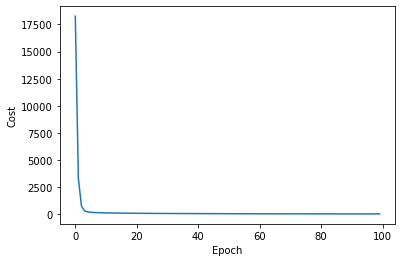

In [13]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer(as_frame=True)
X,y=data.data,data.target
# Since the default in the file is 0=malignant 1=benign we want to reverse these
y=(y==0).astype(int)
X,y= np.array(X),np.array(y)

# Let's set aside a test set and use the remainder for training and cross-validation
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.2)

# Let's scale our data to help the algorithm converge faster
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_scaled_tensor = torch.from_numpy(X_train_scaled).float()
y_train_tensor = torch.from_numpy(y_train).float()

adaline_model = Adaline_torch(eta=0.0001,n_iter=100)
adaline_model.fit(X_train_scaled_tensor,y_train_tensor)
plt.plot(range(len(adaline_model.cost_path)),adaline_model.cost_path)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()